In [1]:
# @toffanetto
import numpy as np
import logistic_regression_classification as cl
import matplotlib.pyplot as plt


/home/toffanetto/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [8]:
# Getting train data
X_train, y_train, classes_rate_train = cl.getData(train=True, raw=True)

print(X_train.shape)

# Getting test data
X_test, y_test, classes_rate_test = cl.getData(train=False, raw=True)

(7352, 768)


2.56

In [9]:
# Training

# Select number of epochs and weights iteration in batch or step-by-step
EPOCHS = 500
BATCH = 500 # 0 for batch or type mini-batch size

W, BA_train, BA_val, J_train, J_val = cl.trainClassifier(X=X_train,y=y_train,epochs=EPOCHS,batch=BATCH,classes_rate=classes_rate_train)

np.save('../model/LR/raw/W_'+str(EPOCHS)+'_epochs_batch_size'+str(BATCH)+'.npy', W)


KeyboardInterrupt: 

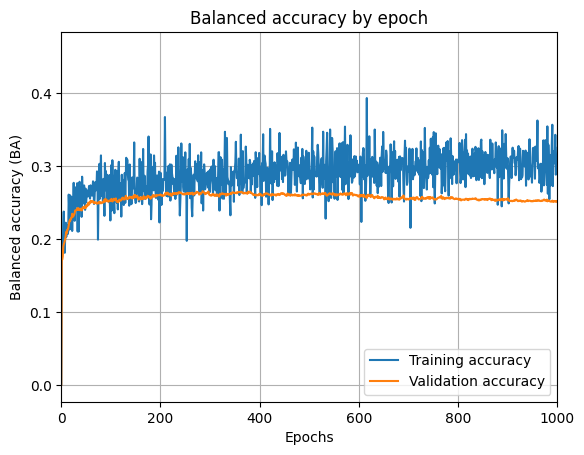

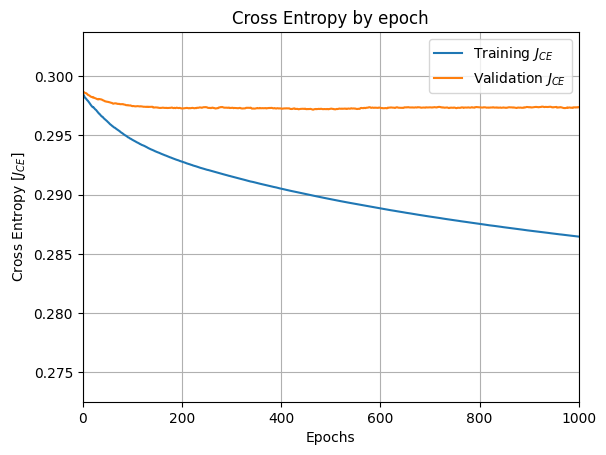

In [ ]:
n = np.linspace(0,EPOCHS,len(BA_val))

plt.figure()
plt.plot(BA_train, label='Training accuracy')
plt.plot(BA_val, label='Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Balanced accuracy (BA)")
plt.title("Balanced accuracy by epoch")
plt.legend(loc='lower right')
plt.xlim([0,EPOCHS])
plt.grid()
plt.savefig('../plot/LR/raw/BA_'+str(EPOCHS)+'_epochs_batch_size'+str(BATCH)+'.pdf', format="pdf", bbox_inches="tight")

n = np.linspace(0,EPOCHS,len(BA_val))

plt.figure()
plt.plot(J_train, label=r'Training $J_{CE}$')
plt.plot(J_val, label=r'Validation $J_{CE}$')
plt.xlabel("Epochs")
plt.ylabel(r"Cross Entropy [$J_{CE}$]")
plt.title("Cross Entropy by epoch")
plt.legend(loc='upper right')
plt.xlim([0,EPOCHS])
plt.grid()
plt.savefig('../plot/LR/raw/CE_'+str(EPOCHS)+'_epochs_batch_size'+str(BATCH)+'.pdf', format="pdf", bbox_inches="tight")

In [13]:
# Testing

EPOCHS = 500
BATCH = 500 # 0 for batch or type mini-batch size

W = np.load('../model/LR/raw/W_'+str(EPOCHS)+'_epochs_batch_size'+str(BATCH)+'.npy')

y_test_hat, class_y_hat = cl.classify(x=X_test,W=W)

confusion_matrix, ba = cl.rateModel(y=y_test, y_hat=class_y_hat, classes_rate=classes_rate_test)

s = 'Confusion Matrix: \n'+str(confusion_matrix)+'\n\nBA = '+str(ba)+'\n\n'

try:
    f = open('../plot/LR_2/output_'+str(EPOCHS)+'_epochs_batch_size'+str(BATCH)+'.txt', "x")
except:
    f = open('../plot/LR_2/output_'+str(EPOCHS)+'_epochs_batch_size'+str(BATCH)+'.txt', "w")
print(s)

score = cl.confusionMatrixExtract(confusion_matrix=confusion_matrix)

for i in range(1,7):
    print(str(i)+'\t'+str("{:.4f}".format(score[i]['Precision']))+'\t'+str("{:.4f}".format(score[i]['Recall'])))
    s+=str(i)+'\t'+str("{:.4f}".format(score[i]['Precision']))+'\t'+str("{:.4f}".format(score[i]['Recall']))
    
f.write(s)
f.close()


Confusion Matrix: 
[[ 99. 177. 149.  13.  19.  39.]
 [ 43. 184. 173.   5.  14.  52.]
 [ 17. 127. 228.  16.  12.  20.]
 [ 15. 109. 139.   8.  31. 189.]
 [ 31. 163. 165.   9.  34. 130.]
 [ 19. 161. 158.   5.  38. 156.]]

BA = 0.2506363229838231


1	0.1996	0.4420
2	0.3907	0.1998
3	0.5429	0.2253
4	0.0163	0.1429
5	0.0639	0.2297
6	0.2905	0.2662
